In [1]:

from utils import *

Using TensorFlow backend.


In [5]:
save_path = "/home/docker/fastai-courses/deeplearning1/nbs/persistent/coco/"
images_path = save_path+"raw_images/val2014"
image_data_arr_path = save_path+"imageDataArr/"
images_concat_t_path = save_path+"imagesConcatT/"
captions_path = save_path+"captions/"
np_save_path = save_path+"temp/"
model_path = save_path+"models/"
images_vgg_features_path = save_path + "images_vgg_features/"

NR_INSTANCES = 1000

In [10]:
def get_captions_from_batch(batch_nr):
    captions = pickle.load(open(captions_path+"val2014_captions_"+str(batch_nr)+".p", "rb" ))
    return captions

def get_truncated_captions_from_batch(batch_nr,nr_instances):
    captions = get_captions_from_batch(batch_nr)
    captions = captions[:nr_instances]
    return captions

def plot_predictions(ims, titles):  
    for i in range(len(ims)):
        plt.title(titles[i])
        plt.imshow(ims[i])
        plt.figure()
            
    plt.show()
    
def make_prediction(random_number):
    startIndex = word2index["START"]
    start_captions = [[startIndex]]
    start_captions = sequence.pad_sequences(start_captions, maxlen=MAX_CAPTION_LEN,padding='post')

    firstImage = np.expand_dims(test_images_concat_t[random_number], axis=0)
    firstCaption = np.expand_dims(start_captions[0], axis=0) 

    outputs = []

    endGenerated = False
    i = 0
    while ((not endGenerated) & (i < MAX_CAPTION_LEN-1)):
    # for i in range(17):
        predictions = model.predict([firstImage, firstCaption])
        predictions = predictions[0]

        currentPred = predictions[i]

        max_index = np.argmax(currentPred)

    #     top3_max_indexes = predictions.argsort()[-4:][::-1]

    #     max_index = top3_max_indexes[3]
    #     print(predictions.shape)

        outputs.append(max_index)
        firstCaption[0,i+1] = max_index

        i+=1

        if(index2word[max_index] == "END"):
            endGenerated = True

    caption = ' '.join([index2word[x] for x in firstCaption[0][:i+1]])
    
    drawImage = firstImage[0]
    drawImageT = np.transpose(drawImage,(1,2,0))
    plt.imshow(drawImageT)
    
    return (drawImageT,caption)


In [11]:
train_images_concat_t = load_array(images_concat_t_path + 'val_imagesConcatT_1000.bc')

In [12]:
captions = get_truncated_captions_from_batch(batch_nr = 0, nr_instances = NR_INSTANCES )

In [13]:
no_to_plot = 10
train_images_concat_t = train_images_concat_t[:no_to_plot]
captions = captions[:no_to_plot]

In [28]:
imagesT = [np.transpose(image,(1,2,0)) for image in list(train_images_concat_t)]

In [29]:
imagesT[0].shape

(224, 224, 3)

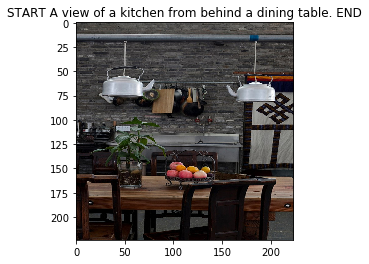

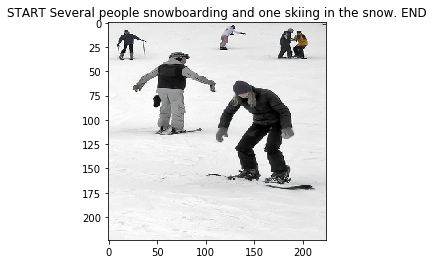

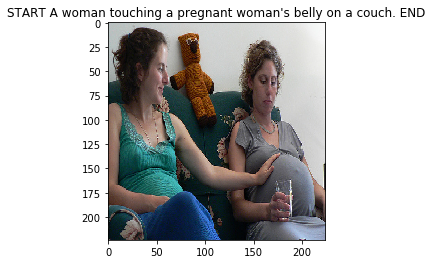

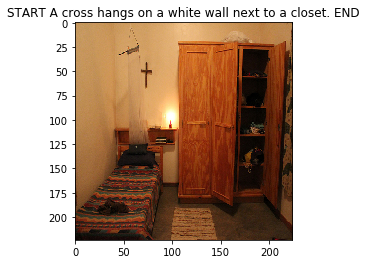

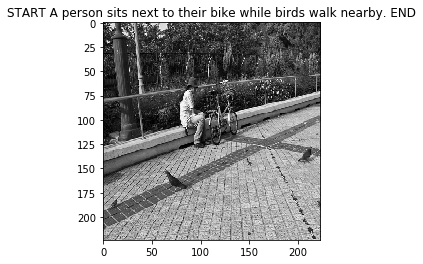

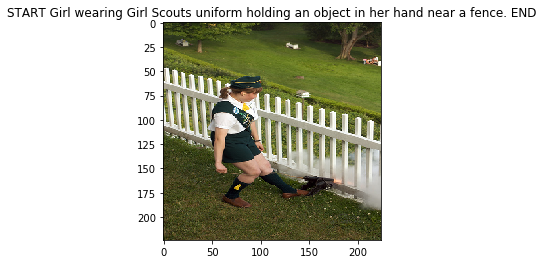

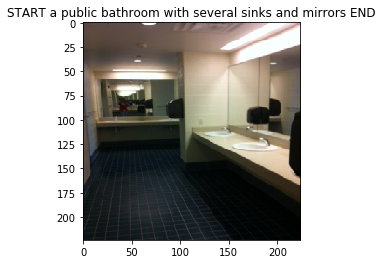

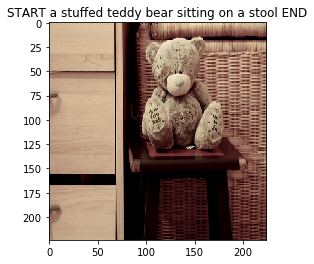

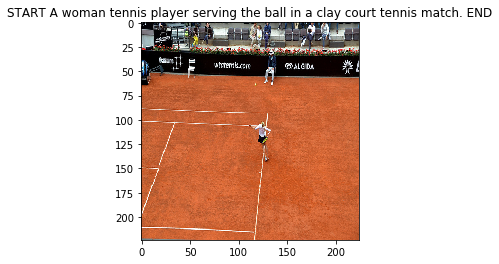

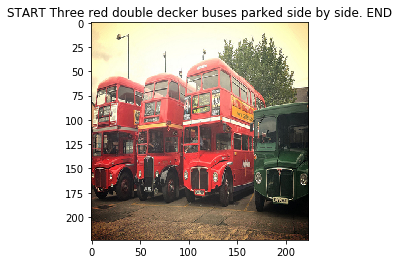

In [30]:
plot_predictions(imagesT,titles = captions)